In [31]:
import pandas as pd
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
data=pd.read_excel('Industry_Portfolios.xlsx',index_col='Date')
df=data.applymap(lambda x: x*0.01)  # change it to decimal by multiplying 0.01

In [32]:
#Show Covaiance table
print('Covariance Table: ')
Cov_table=df.cov()
Cov_table

Covariance Table: 


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.001119,0.001845,0.001410,0.001053,0.001292,0.001197,0.001017,0.000995,0.000787,0.001444
Durbl,0.001845,0.006992,0.003918,0.002702,0.003547,0.002749,0.002744,0.001682,0.001275,0.003936
Manuf,0.001410,0.003918,0.002820,0.002315,0.002462,0.001955,0.001762,0.001360,0.001144,0.002631
Enrgy,0.001053,0.002702,0.002315,0.003698,0.001927,0.001537,0.001130,0.000963,0.001403,0.001832
HiTec,0.001292,0.003547,0.002462,0.001927,0.002896,0.001871,0.001784,0.001325,0.001030,0.002386
Telcm,0.001197,0.002749,0.001955,0.001537,0.001871,0.001979,0.001417,0.001151,0.001099,0.001961
Shops,0.001017,0.002744,0.001762,0.001130,0.001784,0.001417,0.001676,0.001018,0.000669,0.001923
Hlth,0.000995,0.001682,0.001360,0.000963,0.001325,0.001151,0.001018,0.001434,0.000748,0.001486
Utils,0.000787,0.001275,0.001144,0.001403,0.001030,0.001099,0.000669,0.000748,0.001370,0.000999
Other,0.001444,0.003936,0.002631,0.001832,0.002386,0.001961,0.001923,0.001486,0.000999,0.003116


In [33]:
#Show mean returns for each asset
print('Mean Return for Each Asset: ')
df.mean()

Mean Return for Each Asset: 


NoDur    0.009028
Durbl    0.007333
Manuf    0.010128
Enrgy    0.012312
HiTec    0.007662
Telcm    0.008814
Shops    0.009163
Hlth     0.007838
Utils    0.009072
Other    0.004891
dtype: float64

In [34]:
#Show return std for each asset
print('Stardard Deviation for Each Asset:')
df.std()

Stardard Deviation for Each Asset:


NoDur    0.033457
Durbl    0.083619
Manuf    0.053103
Enrgy    0.060815
HiTec    0.053812
Telcm    0.044483
Shops    0.040938
Hlth     0.037872
Utils    0.037018
Other    0.055825
dtype: float64

In [35]:
#Create Return Matrix
def MeanReturnMatrix():
    mean_matrix=np.array([])
    for i in df:
        mean_matrix=np.append(mean_matrix,df[i].mean())
    return mean_matrix

In [36]:
# create matrix Ones
Ones=np.ones(len(MeanReturnMatrix()))  

In [37]:
#Create Covariance Matrix
def CovarianceMatrix():
    cov_matrix=df.cov()
    return np.array(cov_matrix)

In [38]:
#Inverse of Covariance matrix
CovarianceInv=np.linalg.inv(CovarianceMatrix()) 

In [39]:
alpha=np.dot(np.dot(MeanReturnMatrix().transpose(),CovarianceInv),Ones) #calculate alpha
zeta=np.dot(np.dot(MeanReturnMatrix().transpose(),CovarianceInv),MeanReturnMatrix()) #calculate zeta
delta=np.dot(np.dot(Ones.transpose(),CovarianceInv),Ones) #calculate delta

In [40]:
delta

1373.8759735671206

In [41]:
zeta

0.19640858464482353

In [42]:
alpha

13.794323869931933

In [43]:
R_mv=alpha/delta # minimum-variance Return
V_mv=sqrt(1/delta+(delta/(zeta*delta-alpha**2)*(R_mv-alpha/delta)**2))


In [44]:
#Generate 1000 random portfolio target return ranging from 0 to 2%
Rp=[]
for n in range(1000):
  ret=np.random.uniform(0,0.02)
  Rp.append(ret)

In [45]:
# Calculate 1000 volatility based on 1000 target returns
vol=[]
for r in Rp:
    volatility=np.sqrt(1/delta+(delta/(zeta*delta-alpha**2))*(r-alpha/delta)**2)
    vol.append(volatility)
vol

[0.0458165639652023,
 0.02697931436051187,
 0.04334444264765524,
 0.03142927318484136,
 0.0316416781274971,
 0.03229768324582994,
 0.046674662039378575,
 0.027085343848885883,
 0.04660522874504725,
 0.04118163671778187,
 0.048661600207874876,
 0.027952457789443056,
 0.03173643965228511,
 0.03617065501334303,
 0.042967438083879754,
 0.027624298896957614,
 0.03414650646462023,
 0.04487614694132758,
 0.0410712140005045,
 0.04617287714304112,
 0.04097366654193384,
 0.029520223234089205,
 0.02742123184376892,
 0.0272598676008781,
 0.045000987852841956,
 0.03833121902234994,
 0.04208263559057685,
 0.0357882797675587,
 0.031004178656683735,
 0.034230992285948836,
 0.03264169711132868,
 0.044399774942519864,
 0.030138765869341867,
 0.03412502464447955,
 0.02894356327886427,
 0.03888035047846143,
 0.04778602839645315,
 0.043024778309508044,
 0.04297504412026132,
 0.03694165199989467,
 0.04225361378365728,
 0.032952669455775026,
 0.0405317038155434,
 0.04704051934000054,
 0.04060164836159171,
 0

In [46]:
#plot minimum variance frontier
def PlotMinVar():
    plt.figure(figsize=(15,10))
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.scatter(vol,Rp,alpha=1)
    plt.gca().set_yticklabels(['{:.02f}%'.format(y*100) for y in plt.gca().get_yticks()]) # format axis to %
    plt.gca().set_xticklabels(['{:.02f}%'.format(x*100) for x in plt.gca().get_xticks()])
    plt.title('Minimum Variance')
    plt.savefig('Minimum Variance',dpi=1000)
    plt.grid()
    plt.show()


In [47]:
# Get top half which is efficient frontier
Rp_new=[]
vol_new=[]
for i in range(len(Rp)):
    if Rp[i]>=R_mv:
        Rp_new.append(Rp[i])
        vol_new.append(vol[i])

In [48]:
#Get bottom half
Rp_btm=[]
vol_btm=[]
for j in range(len(Rp)):
    if Rp[j]<=R_mv:
        Rp_btm.append(Rp[j])
        vol_btm.append(vol[j])

In [49]:
#plot efficient frontier
def PlotEF():
    plt.figure(figsize=(15,10))
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    #plt.yticks(np.arange(0, 0.1, 0.001))
    #plt.xticks(np.arange(0, 0.04, 0.001))
    plt.scatter(vol_new,Rp_new,alpha=1)
    plt.scatter(vol_btm,Rp_btm,c='g',linestyle='--',marker='o',alpha=0.05,s=50)
    plt.plot(V_mv,R_mv,c='k',marker='o',markersize=10)
    plt.annotate(s='Minimum Variance:Volatilaty={:.03%} Return={:.03%}'.format(V_mv,R_mv),xy=(V_mv,R_mv),xycoords='data',xytext=(+30,-10),textcoords='offset points')
    plt.gca().set_yticklabels(['{:.02f}%'.format(y*100) for y in plt.gca().get_yticks()]) # format axis to %
    plt.gca().set_xticklabels(['{:.02f}%'.format(x*100) for x in plt.gca().get_xticks()])
    plt.title('Efficient Frontier')
    plt.savefig('Efficient Frontier',dpi=1000)
    plt.grid()
    plt.show()
    
    
    

In [50]:
#calculate tangent return and volatility
Rf=0.13*0.01
R_tg=(alpha*Rf-zeta)/(delta*Rf-alpha)
vol_tg=sqrt((zeta-2*alpha*Rf+delta*(Rf**2))/((delta**2)*((Rf-R_mv)**2)))


In [51]:
#sharpe ratio
sharpe_ratio=(R_tg-Rf)/vol_tg

In [52]:
#extend the line
R_ex=0.1*sharpe_ratio+Rf
vol_tg
R_tg

0.014862735358446925

In [53]:
def EFwithRf():
    plt.figure(figsize=(15,10))
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.xlim(0,0.06)
    plt.ylim(0,0.023)
    #plt.yticks(np.arange(0, 0.1, 0.001))
    #plt.xticks(np.arange(0, 0.04, 0.001))
    plt.scatter(vol_new,Rp_new,alpha=1,linewidth=3)
    plt.scatter(vol_btm,Rp_btm,c='g',linestyle='--',marker='o',alpha=0.05,s=50,linewidth=0.1)
    plt.plot([vol_tg,0],[R_tg,Rf],c='r',linewidth=2,marker='o')
    plt.plot([0.1,vol_tg],[R_ex,R_tg],c='r',linewidth=2,marker='o')  #extend the line
    plt.annotate(s='Tangent Portfolio:Volatilaty={:.03%} Return={:.03%}'.format(vol_tg,R_tg),xy=(vol_tg,R_tg),xycoords='data',xytext=(+20,-10),textcoords='offset points')
    plt.gca().set_yticklabels(['{:.02f}%'.format(y*100) for y in plt.gca().get_yticks()]) # format y axis to %
    plt.gca().set_xticklabels(['{:.02f}%'.format(x*100) for x in plt.gca().get_xticks()]) # format x axis to %
    plt.title('Efficient Frontier with Riskless Asset')
    plt.savefig('Efficient Frontier with Riskless Asset')
    plt.grid()
    plt.show()

In [54]:
# tangent portfolio weightfor each asset
weight=(delta*R_tg-alpha)/(zeta*delta-alpha**2)*np.dot(CovarianceInv,MeanReturnMatrix())+((zeta-alpha*R_tg)/(zeta*delta-alpha**2))*np.dot(CovarianceInv,Ones)
print('Assets weights at tangent portfolio:\n{}'.format(pd.Series(np.round(weight,2),index=df.columns)))
print('')
print('Sum of weights is: {}'.format(round(weight.sum())))  #verify sum of weights is 1

Assets weights at tangent portfolio:
NoDur    0.57
Durbl   -0.21
Manuf    0.71
Enrgy    0.10
HiTec   -0.36
Telcm   -0.10
Shops    0.99
Hlth     0.08
Utils    0.13
Other   -0.91
dtype: float64

Sum of weights is: 1.0


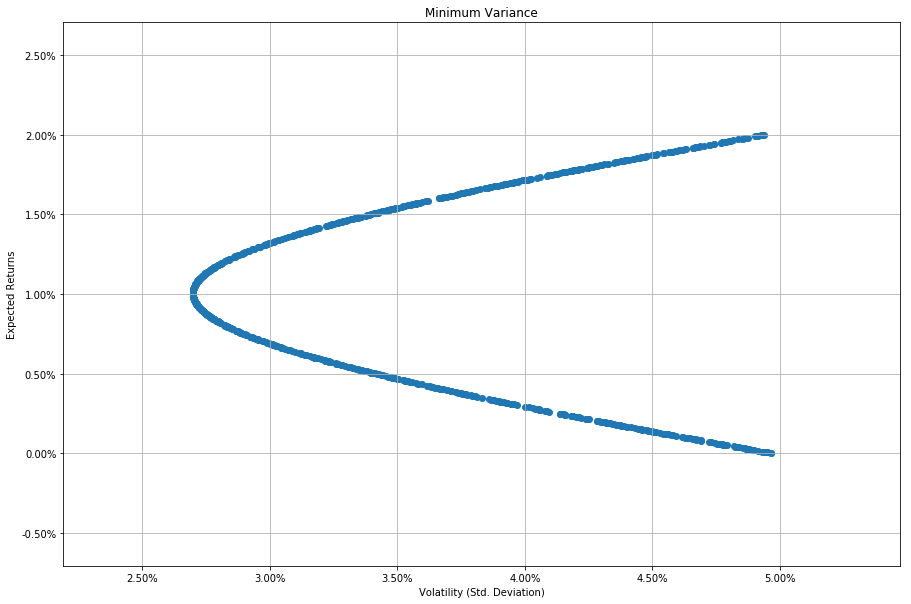

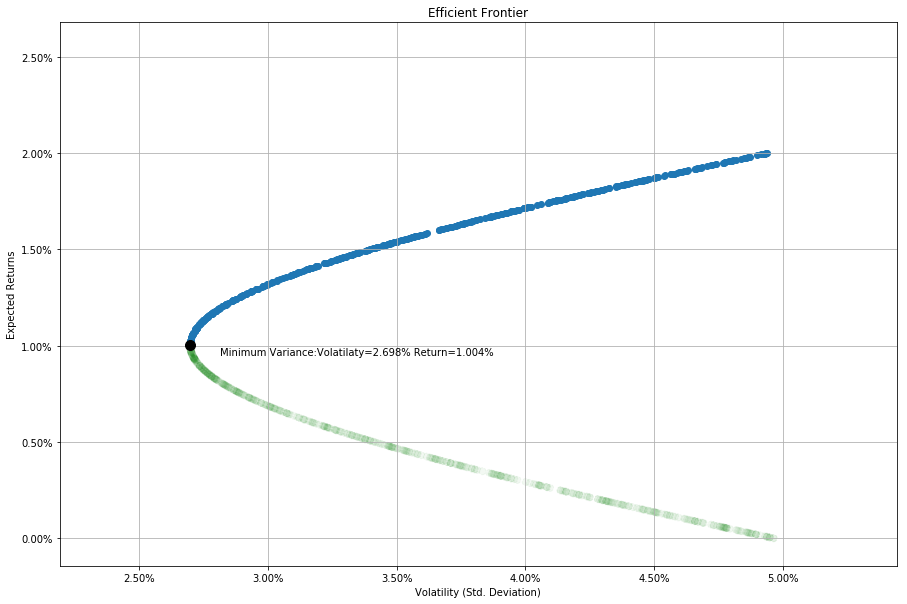

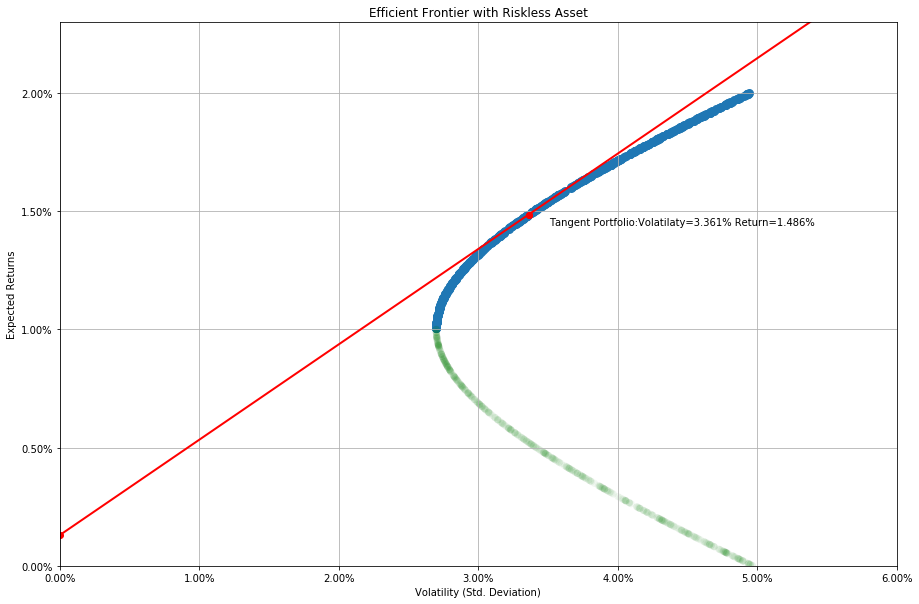

In [55]:
def main():
    PlotMinVar()
    print('')
    PlotEF()
    print('')
    EFwithRf()
main()